# Comprehensive Analysis of our Exploitation+Exploration strategy

1. Comparison between 90%+10% hybrid strategies and 100% DATE
    - DATE(90%)+random(10%)
    - DATE(90%)+diversity(10%)
    - DATE(90%)+BADGE(10%)
    - DATE(90%)+bATE(10%)
    - DATE(100%)

## 1. Comparison between Hybrid Strategies (by changing Exploration part) and DATE only

In [1]:
import numpy as np
import pandas as pd
import glob 
import os
pd.options.display.max_columns=50

In [2]:
results = glob.glob('./results/performances/quick-result-*')   # quick- or www21- 
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))

In [3]:
len(list2)

77

### Collecting Result Files: Results of Individual Experiments

In [4]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
num_logs = len([i for i in list1 if i > 1000])
count= 0
for i in range(1,num_logs+1):
    try:
        df = pd.read_csv(list2[-i])
        var = 'norm-revenue'
        rolling_mean7 = df[var].rolling(window=7).mean()
        rolling_mean14 = df[var].rolling(window=14).mean()
        filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
        info = ','.join(list(df[['data', 'subsamplings']].iloc[0]))
        full_results[info].append(rolling_mean14)
        count += 1
        
### Draw individual figures
#         plt.figure()
#         plt.title(info+','+filename)
#         plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
#         plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
#         plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
#         plt.legend(loc='upper left')
#         plt.ylabel(var)
#         plt.xlabel('numWeeks')
#         plt.show()
    except:
        print('loading error:', list2[-i])
        continue
print(count)
#     plt.close()

67


### Mdata Simulation Results

In [5]:
full_results.keys()

dict_keys(['real-n,DATE/random', 'real-n,DATE/badge', 'real-n,-', 'real-t,DATE/random', 'real-t,-', 'real-m,DATE/diversity', 'real-m,DATE/random', 'real-m,DATE/badge', 'real-m,DATE/bATE', 'real-t,DATE/diversity', 'real-m,-', 'real-t,DATE/badge', 'real-n,DATE/diversity', 'real-n,DATE/bATE', 'real-t,DATE/bATE'])

The number of trials for each setting (Results are averaged):
real-m,DATE/diversity 3
real-m,DATE/random 5
real-m,DATE/badge 5
real-m,DATE/bATE 5
real-m,- 6


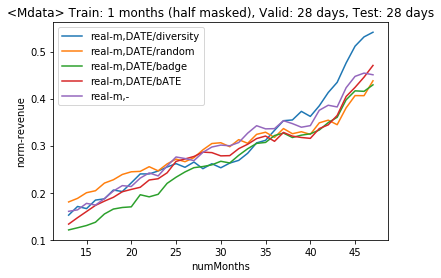

In [6]:
plt.figure()
# info = ','.join(list(df[['data', 'samplings']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-m' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Mdata> Train: 1 months (half masked), Valid: 28 days, Test: 28 days')
plt.legend(loc='upper left')
plt.ylabel(var)
plt.xlabel('numMonths')
plt.show()
plt.close()

### Tdata Simulation Results

The number of trials for each setting (Results are averaged):
real-t,DATE/random 6
real-t,- 5
real-t,DATE/diversity 1
real-t,DATE/badge 5
real-t,DATE/bATE 5


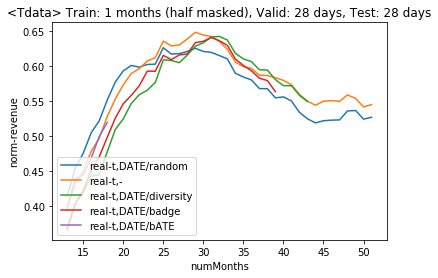

In [7]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)

# # printing test_illicit_rate
# tir = pd.read_csv(list2[-1])['test_illicit_rate'].rolling(window=7).mean()
# plt.plot(tir.index, tir, label='Test illicit rate (ref)')

plt.title('<Tdata> Train: 1 months (half masked), Valid: 28 days, Test: 28 days')
plt.legend(loc='lower left')
plt.ylabel(var)
plt.xlabel('numMonths')
plt.show()
plt.close()

### Ndata Simulation Results

The number of trials for each setting (Results are averaged):
real-n,DATE/random 5
real-n,DATE/badge 5
real-n,- 5
real-n,DATE/diversity 1
real-n,DATE/bATE 5


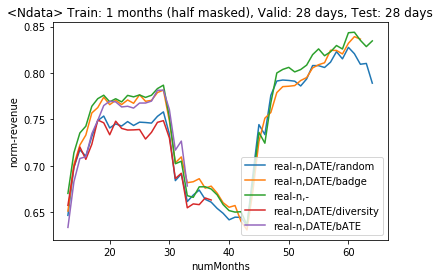

In [8]:
plt.figure()
result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)
    
plt.title('<Ndata> Train: 1 months (half masked), Valid: 28 days, Test: 28 days')
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numMonths')
plt.show()
plt.close()

# Comprehensive Analysis of our Exploitation+Exploration strategy

1. 